In [1]:
# Import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [75]:
# Import the dataset
data = pd.read_excel('Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [77]:
# Let's look at the null value first
data[data['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,Null,7480


In [78]:
# Only 1 row has both NA values. We can safely remove this row
data.drop(data[data['Route'].isna()].index, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


# Airline Column

In [79]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

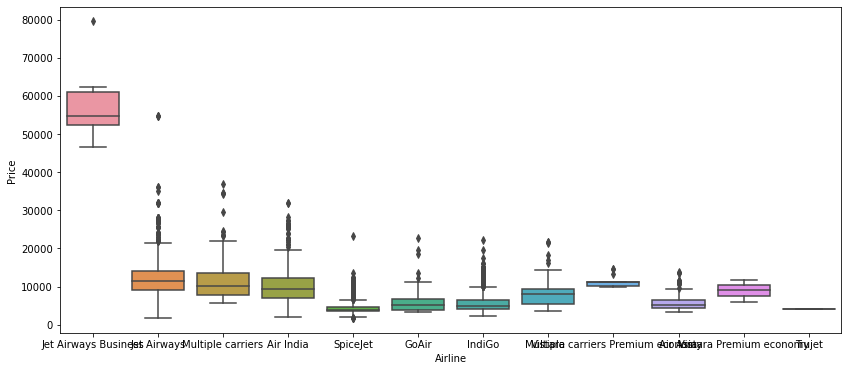

In [80]:
# Price comparision of different airlines
plt.figure(figsize=(14,6))
g = sns.boxplot(x = 'Airline', y = 'Price', data = data.sort_values('Price', ascending = False))

In [81]:
"""
From the data above, the bottom 4 categories hardly make 0.1% of the data. We could deal with them in 2 ways,
1. Add the data into the other categories
2. Remove the data altogether

We will experiment with the first method first.

Jet Airways Business ---> Jet Airways
Vistara Premium economy ---> Vistara
Multiple carriers Premium economy  ---> Multiple carriers
"""

'\nFrom the data above, the bottom 4 categories hardly make 0.1% of the data. We could deal with them in 2 ways,\n1. Add the data into the other categories\n2. Remove the data altogether\n\nWe will experiment with the first method first.\n\nJet Airways Business ---> Jet Airways\nVistara Premium economy ---> Vistara\nMultiple carriers Premium economy  ---> Multiple carriers\n'

In [82]:
data.loc[data['Airline'] == 'Jet Airways Business'] = 'Jet Airways'
data.loc[data['Airline'] == 'Vistara Premium economy'] = 'Vistara'
data.loc[data['Airline'] == 'Multiple carriers Premium economy'] = 'Multiple carriers'

# Only 1 value of the Trujet carrier is insignicant, we can include this row into Jet Airways
data.loc[data['Airline'] == 'Trujet'] = 'Jet Airways'

In [83]:
data['Airline'].value_counts()

Jet Airways          3856
IndiGo               2053
Air India            1751
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Name: Airline, dtype: int64

In [84]:
# Create dummy columns for all airlines
airline_dummies = pd.get_dummies(data['Airline'], drop_first=True)
airline_dummies

,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0
10680,0,0,0,1,0,0,0
10681,0,0,0,0,0,0,1


In [85]:
data.drop('Airline', axis = 1, inplace = True)

# Date of Journey Column

In [86]:
# Now we look at the Date_of_Journey column
data['Date_of_Journey'].value_counts()

18/05/2019           504
6/06/2019            503
21/05/2019           497
9/06/2019            495
12/06/2019           493
9/05/2019            484
21/03/2019           410
15/05/2019           405
27/05/2019           382
27/06/2019           355
24/06/2019           351
1/06/2019            342
3/06/2019            333
15/06/2019           328
24/03/2019           323
6/03/2019            306
27/03/2019           299
24/05/2019           286
6/05/2019            281
1/05/2019            277
12/05/2019           259
1/04/2019            257
3/03/2019            217
9/03/2019            200
15/03/2019           162
18/03/2019           156
01/03/2019           148
12/03/2019           142
9/04/2019            125
3/04/2019            110
21/06/2019           109
18/06/2019           105
09/03/2019           102
6/04/2019             99
03/03/2019            96
06/03/2019            95
27/04/2019            94
24/04/2019            92
3/05/2019             90
15/04/2019            89


In [87]:
# The last 3 rows have incorrect dates. Let's remove these rows as there are only 23 such records.
my_list = ['Multiple carriers', 'Jet Airways', 'Vistara']

for i in range(len(my_list)):
    data.drop(data[data['Date_of_Journey'] == my_list[i]].index, inplace=True)
    
data['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    410
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     306
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     217
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    148
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019      99
03/03/2019     96
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      46
Name: Date_of_Journey, dtype: int64

In [88]:
# Let's convert this column into datetime
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])

# We will add another column named 'Day_of_Week'. The flight prices are high on certain days than others.
data['Day_of_Week'] = data['Date_of_Journey'].dt.day_name()

<AxesSubplot:xlabel='Day_of_Week', ylabel='Price'>

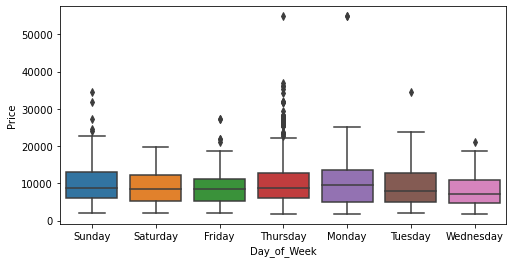

In [89]:
plt.figure(figsize=(8,4))
sns.boxplot(x = 'Day_of_Week', data = data, y = 'Price')

In [90]:
# Saturday, Friday, and Wednesday has lower prices as compared to the other days of the week
journey_day_dummies = pd.get_dummies(data['Day_of_Week'], drop_first=True)
data.drop('Day_of_Week', axis = 1, inplace = True)

In [91]:
journey_day_dummies

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
10678,0,0,0,0,0,1
10679,0,1,0,0,0,0
10680,0,1,0,0,0,0
10681,0,0,0,1,0,0


In [92]:
# We will add another column named 'Month'. Let's check how the prices vary in different months.
data['Month'] = data['Date_of_Journey'].dt.month

<AxesSubplot:xlabel='Month', ylabel='Price'>

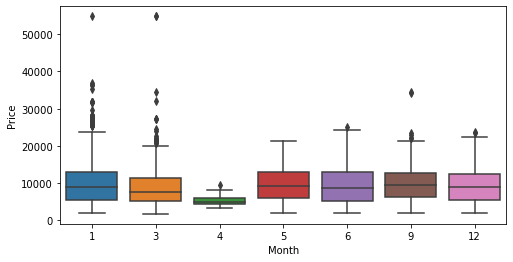

In [93]:
plt.figure(figsize=(8,4))
sns.boxplot(x = 'Month', data = data, y = 'Price')

In [94]:
# Remove Date_of_Journey column
data.drop('Date_of_Journey', axis = 1, inplace = True)

# Source Column

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10659 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Source           10659 non-null  object
 1   Destination      10659 non-null  object
 2   Route            10659 non-null  object
 3   Dep_Time         10659 non-null  object
 4   Arrival_Time     10659 non-null  object
 5   Duration         10659 non-null  object
 6   Total_Stops      10659 non-null  object
 7   Additional_Info  10659 non-null  object
 8   Price            10659 non-null  object
 9   Month            10659 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


In [96]:
data['Source'].value_counts()

Delhi       4521
Kolkata     2871
Banglore    2191
Mumbai       696
Chennai      380
Name: Source, dtype: int64

In [97]:
source_dummies = pd.get_dummies(data['Source'], prefix = 'source', drop_first=True)
source_dummies

,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [98]:
data.drop('Source', axis = 1, inplace = True)

# Destination Column

In [99]:
data['Destination'].value_counts()

Cochin       4521
Banglore     2871
Delhi        1264
New Delhi     927
Hyderabad     696
Kolkata       380
Name: Destination, dtype: int64

In [100]:
dest_dummies = pd.get_dummies(data['Destination'], prefix = 'des', drop_first=True)
dest_dummies

,des_Cochin,des_Delhi,des_Hyderabad,des_Kolkata,des_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [101]:
data.drop('Destination', axis = 1, inplace = True)

# Route

In [28]:
data['Route'].value_counts()

DEL → BOM → COK                2363
BLR → DEL                      1550
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → GOI → HYD                   1
CCU → RPR → HYD → BLR             1
BOM → VNS → DEL → HYD             1
BOM → RPR → VTZ → HYD             1
BOM → BLR → CCU → BBI → HYD       1
Name: Route, Length: 127, dtype: int64

In [29]:
# Convert the flight route into corresponding columns
data['Route_1'] = data['Route'].str.split('→').str[0]
data['Route_2'] = data['Route'].str.split('→').str[1]
data['Route_3'] = data['Route'].str.split('→').str[2]
data['Route_4'] = data['Route'].str.split('→').str[3]
data['Route_5'] = data['Route'].str.split('→').str[4]

In [30]:
data.drop('Route', axis = 1, inplace = True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10659 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Dep_Time         10659 non-null  object
 1   Arrival_Time     10659 non-null  object
 2   Duration         10659 non-null  object
 3   Total_Stops      10659 non-null  object
 4   Additional_Info  10659 non-null  object
 5   Price            10659 non-null  object
 6   Month            10659 non-null  int64 
 7   Route_1          10659 non-null  object
 8   Route_2          10659 non-null  object
 9   Route_3          7171 non-null   object
 10  Route_4          1564 non-null   object
 11  Route_5          46 non-null     object
dtypes: int64(1), object(11)
memory usage: 1.3+ MB


In [32]:
# Fill the null values in the Routes columns with 'None'
for i in ['Route_3', 'Route_4', 'Route_5']:
    data[i].fillna('None', inplace = True)

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    data[i] = le.fit_transform(data[i])

In [72]:
data.head()

,Total_Stops,Price,Month,Route_1,Route_2,Route_3,Route_4,Route_5,dep_time_hour,dep_time_min,arr_time_hour,arr_time_min,Duration_Hour,Duration_Min
0,0,3897,3,0,13,29,13,5,22,20,1,10,2,50
1,2,7662,1,2,25,1,3,5,5,50,13,15,7,25
2,2,13882,9,3,32,4,5,5,9,25,4,25,19,0
3,1,6218,12,2,34,3,13,5,18,5,23,30,5,25
4,1,13302,1,0,34,8,13,5,16,50,21,35,4,45


# Dep_Time Column

In [37]:
data['dep_time_hour'] = data['Dep_Time'].str.split(":").str[0]
data['dep_time_hour'] = data['dep_time_hour'].astype('int64')

In [38]:
data['dep_time_min'] = data['Dep_Time'].str.split(":").str[1]
data['dep_time_min'] = data['dep_time_min'].astype('int64')

In [39]:
data.drop('Dep_Time', axis = 1, inplace = True)

In [40]:
data.head()

,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Route_1,Route_2,Route_3,Route_4,Route_5,dep_time_hour,dep_time_min
0,01:10 22 Mar,2h 50m,non-stop,Null,3897,3,0,13,29,13,5,22,20
1,13:15,7h 25m,2 stops,Null,7662,1,2,25,1,3,5,5,50
2,04:25 10 Jun,19h,2 stops,Null,13882,9,3,32,4,5,5,9,25
3,23:30,5h 25m,1 stop,Null,6218,12,2,34,3,13,5,18,5
4,21:35,4h 45m,1 stop,Null,13302,1,0,34,8,13,5,16,50


# Arrival_Time Column

In [41]:
data['arr_time_hour'] = data['Arrival_Time'].str[:2]
data['arr_time_hour'] = data['arr_time_hour'].astype('int64')

In [42]:
data['arr_time_min'] = data['Arrival_Time'].str[3:5]
data['arr_time_min'] = data['arr_time_min'].astype('int64')

In [43]:
data.drop('Arrival_Time', axis = 1, inplace = True)

In [71]:
data.head()

,Total_Stops,Price,Month,Route_1,Route_2,Route_3,Route_4,Route_5,dep_time_hour,dep_time_min,arr_time_hour,arr_time_min,Duration_Hour,Duration_Min
0,0,3897,3,0,13,29,13,5,22,20,1,10,2,50
1,2,7662,1,2,25,1,3,5,5,50,13,15,7,25
2,2,13882,9,3,32,4,5,5,9,25,4,25,19,0
3,1,6218,12,2,34,3,13,5,18,5,23,30,5,25
4,1,13302,1,0,34,8,13,5,16,50,21,35,4,45


In [44]:
data['Price'] = data['Price'].astype('int32')

# Additional_Info Column

In [46]:
data['Additional_Info'].value_counts()

Null                            8326
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
2 Long layover                     1
Null                               1
Business class                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [47]:
# More than 80% data has Null data. We can safely remove this column.

In [48]:
data.drop('Additional_Info', axis = 1, inplace = True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10659 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Duration       10659 non-null  object
 1   Total_Stops    10659 non-null  object
 2   Price          10659 non-null  int32 
 3   Month          10659 non-null  int64 
 4   Route_1        10659 non-null  int32 
 5   Route_2        10659 non-null  int32 
 6   Route_3        10659 non-null  int32 
 7   Route_4        10659 non-null  int32 
 8   Route_5        10659 non-null  int32 
 9   dep_time_hour  10659 non-null  int64 
 10  dep_time_min   10659 non-null  int64 
 11  arr_time_hour  10659 non-null  int64 
 12  arr_time_min   10659 non-null  int64 
dtypes: int32(6), int64(5), object(2)
memory usage: 1.1+ MB


# Total_Stops Column

In [50]:
data['Total_Stops'].value_counts()

1 stop      5607
non-stop    3488
2 stops     1518
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [51]:
# Define a function to convert no of stops to equal number of integer values
def flight_stop(col):
    if col == 'non-stop':
        return 0
    
    elif col == '1 stop':
        return 1
    
    elif col == '2 stops':
        return 2
    
    elif col == '3 stops':
        return 3
    
    else:
        return 4

In [52]:
data['Total_Stops'] = data['Total_Stops'].apply(flight_stop)

In [53]:
data.head()

,Duration,Total_Stops,Price,Month,Route_1,Route_2,Route_3,Route_4,Route_5,dep_time_hour,dep_time_min,arr_time_hour,arr_time_min
0,2h 50m,0,3897,3,0,13,29,13,5,22,20,1,10
1,7h 25m,2,7662,1,2,25,1,3,5,5,50,13,15
2,19h,2,13882,9,3,32,4,5,5,9,25,4,25
3,5h 25m,1,6218,12,2,34,3,13,5,18,5,23,30
4,4h 45m,1,13302,1,0,34,8,13,5,16,50,21,35


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10659 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Duration       10659 non-null  object
 1   Total_Stops    10659 non-null  int64 
 2   Price          10659 non-null  int32 
 3   Month          10659 non-null  int64 
 4   Route_1        10659 non-null  int32 
 5   Route_2        10659 non-null  int32 
 6   Route_3        10659 non-null  int32 
 7   Route_4        10659 non-null  int32 
 8   Route_5        10659 non-null  int32 
 9   dep_time_hour  10659 non-null  int64 
 10  dep_time_min   10659 non-null  int64 
 11  arr_time_hour  10659 non-null  int64 
 12  arr_time_min   10659 non-null  int64 
dtypes: int32(6), int64(6), object(1)
memory usage: 1.1+ MB


# Duration

In [55]:
data['Duration'].value_counts()

2h 50m     549
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     328
          ... 
32h 55m      1
40h 20m      1
29h 10m      1
35h 35m      1
13h 35m      1
Name: Duration, Length: 368, dtype: int64

In [56]:
# Function to extract the hour from the duration column
def extract_hour(col):
    str_list = col.split(" ")
    
    if len(str_list[0]) == 2:
        return int(str_list[0][0])
    
    else:
        return int(str_list[0][:2])

In [57]:
data['Duration_Hour'] = data['Duration'].apply(extract_hour)
data.head()

,Duration,Total_Stops,Price,Month,Route_1,Route_2,Route_3,Route_4,Route_5,dep_time_hour,dep_time_min,arr_time_hour,arr_time_min,Duration_Hour
0,2h 50m,0,3897,3,0,13,29,13,5,22,20,1,10,2
1,7h 25m,2,7662,1,2,25,1,3,5,5,50,13,15,7
2,19h,2,13882,9,3,32,4,5,5,9,25,4,25,19
3,5h 25m,1,6218,12,2,34,3,13,5,18,5,23,30,5
4,4h 45m,1,13302,1,0,34,8,13,5,16,50,21,35,4


In [58]:
# Function to extract the minutes from the duration column
def extract_min(col):
    str_list = col.split(" ")
    
    try:
        if len(str_list[1]) == 2:
            return int(str_list[1][0])

        else:
            return int(str_list[1][:2])
        
    except:
        return 0

In [59]:
data['Duration_Min'] = data['Duration'].apply(extract_min)
data.head()

,Duration,Total_Stops,Price,Month,Route_1,Route_2,Route_3,Route_4,Route_5,dep_time_hour,dep_time_min,arr_time_hour,arr_time_min,Duration_Hour,Duration_Min
0,2h 50m,0,3897,3,0,13,29,13,5,22,20,1,10,2,50
1,7h 25m,2,7662,1,2,25,1,3,5,5,50,13,15,7,25
2,19h,2,13882,9,3,32,4,5,5,9,25,4,25,19,0
3,5h 25m,1,6218,12,2,34,3,13,5,18,5,23,30,5,25
4,4h 45m,1,13302,1,0,34,8,13,5,16,50,21,35,4,45


In [60]:
data.drop('Duration', axis = 1, inplace = True)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10659 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Total_Stops    10659 non-null  int64
 1   Price          10659 non-null  int32
 2   Month          10659 non-null  int64
 3   Route_1        10659 non-null  int32
 4   Route_2        10659 non-null  int32
 5   Route_3        10659 non-null  int32
 6   Route_4        10659 non-null  int32
 7   Route_5        10659 non-null  int32
 8   dep_time_hour  10659 non-null  int64
 9   dep_time_min   10659 non-null  int64
 10  arr_time_hour  10659 non-null  int64
 11  arr_time_min   10659 non-null  int64
 12  Duration_Hour  10659 non-null  int64
 13  Duration_Min   10659 non-null  int64
dtypes: int32(6), int64(8)
memory usage: 1.2 MB


In [62]:
# Now we concat all the other dummy columns
final_data = pd.concat([airline_dummies, journey_day_dummies, source_dummies, dest_dummies, data], axis = 1)

In [109]:
final_data.head()

,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara,Monday,...,Route_4,Route_5,dep_time_hour,dep_time_min,arr_time_hour,arr_time_min,Duration_Hour,Duration_Min
0,0,0,1,0,0,0,0,0.0,...,13.0,5.0,22.0,20.0,1.0,10.0,2.0,50.0
1,1,0,0,0,0,0,0,0.0,...,3.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0
2,0,0,0,1,0,0,0,0.0,...,5.0,5.0,9.0,25.0,4.0,25.0,19.0,0.0
3,0,0,1,0,0,0,0,0.0,...,13.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0
4,0,0,1,0,0,0,0,0.0,...,13.0,5.0,16.0,50.0,21.0,35.0,4.0,45.0


In [64]:
final_data.corr()

,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara,Monday,Saturday,Sunday,...,Route_2,Route_3,Route_4,Route_5,dep_time_hour,dep_time_min,arr_time_hour,arr_time_min,Duration_Hour,Duration_Min
Air India,1.000000,-0.060221,-0.215977,-0.332796,-0.158184,-0.127510,-0.096253,-0.013588,-0.010100,0.010042,...,0.155884,-0.036852,-0.395358,-0.114308,-0.013440,-0.045863,0.089031,0.061306,0.261667,-0.033651
GoAir,-0.060221,1.000000,-0.066339,-0.102221,-0.048587,-0.039166,-0.029565,0.001821,0.002450,0.020421,...,-0.046257,0.040555,0.055816,0.008752,-0.016559,0.076827,0.018564,0.096916,-0.094185,0.067238
IndiGo,-0.215977,-0.066339,1.000000,-0.366606,-0.174254,-0.140464,-0.106032,0.004260,-0.015568,0.040414,...,0.062754,0.288034,0.187805,0.031394,-0.024027,-0.014852,-0.071471,0.035178,-0.346821,0.119824
Jet Airways,-0.332796,-0.102221,-0.366606,1.000000,-0.268506,-0.216439,-0.163384,-0.015034,0.019502,-0.061855,...,-0.085982,-0.305231,-0.056391,0.048323,0.113212,0.024329,-0.027280,-0.057745,0.306918,-0.084368
Multiple carriers,-0.158184,-0.048587,-0.174254,-0.268506,1.000000,-0.102877,-0.077659,0.051383,-0.002803,0.004035,...,-0.130680,-0.219491,0.103812,-0.013154,-0.150614,-0.109618,0.068048,-0.167584,-0.008347,-0.118975
SpiceJet,-0.127510,-0.039166,-0.140464,-0.216439,-0.102877,1.000000,-0.062600,-0.001291,0.000756,0.005480,...,0.055133,0.291586,0.118192,0.018532,-0.010817,0.092703,-0.090077,0.012565,-0.264186,0.041284
Vistara,-0.096253,-0.029565,-0.106032,-0.163384,-0.077659,-0.062600,1.000000,-0.018175,-0.002950,0.017198,...,0.015456,0.089468,0.088925,0.013943,0.023667,-0.078064,0.068923,0.069484,-0.020533,0.041934
Monday,-0.013588,0.001821,0.004260,-0.015034,0.051383,-0.001291,-0.018175,1.000000,-0.143728,-0.133907,...,-0.025535,0.023940,0.008005,0.006438,-0.018155,0.002352,-0.005250,-0.021525,-0.011473,-0.023389
Saturday,-0.010100,0.002450,-0.015568,0.019502,-0.002803,0.000756,-0.002950,-0.143728,1.000000,-0.118527,...,0.009147,-0.025200,-0.026997,0.009459,0.003085,-0.010187,0.000449,-0.020955,0.017353,0.003985
Sunday,0.010042,0.020421,0.040414,-0.061855,0.004035,0.005480,0.017198,-0.133907,-0.118527,1.000000,...,0.008687,0.051135,0.021745,-0.011867,-0.022685,0.025174,-0.005795,0.021809,-0.029892,0.044839


# Check for outliers

<AxesSubplot:xlabel='Price'>

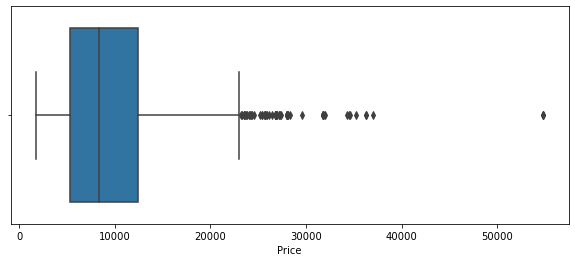

In [65]:
plt.figure(figsize=(10,4))
sns.boxplot(final_data['Price'])

In [66]:
final_data[final_data['Price']>40000]['Price']

1478    54826.0
2618    54826.0
5439    54826.0
Name: Price, dtype: float64

In [67]:
# There are 3 prices which are above 40000. We can treat them as outliers and cap the price at 40000 and remove them.
final_data = final_data.drop(final_data[final_data['Price']>40000].index)

<AxesSubplot:xlabel='Price'>

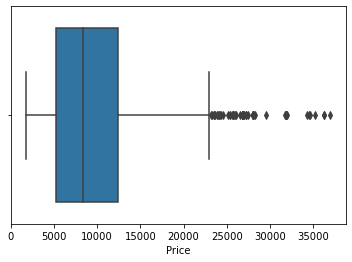

In [68]:
sns.boxplot(final_data['Price'])

In [69]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10679 entries, 0 to 10682
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Air India          10679 non-null  uint8  
 1   GoAir              10679 non-null  uint8  
 2   IndiGo             10679 non-null  uint8  
 3   Jet Airways        10679 non-null  uint8  
 4   Multiple carriers  10679 non-null  uint8  
 5   SpiceJet           10679 non-null  uint8  
 6   Vistara            10679 non-null  uint8  
 7   Monday             10656 non-null  float64
 8   Saturday           10656 non-null  float64
 9   Sunday             10656 non-null  float64
 10  Thursday           10656 non-null  float64
 11  Tuesday            10656 non-null  float64
 12  Wednesday          10656 non-null  float64
 13  source_Chennai     10656 non-null  float64
 14  source_Delhi       10656 non-null  float64
 15  source_Kolkata     10656 non-null  float64
 16  source_Mumbai      106

In [70]:
final_data.fillna(value = 0, inplace = True)

# Model building

In [110]:
# Separate dependent and independent variable
X = final_data.drop('Price', axis = 1)
y = final_data['Price']

In [111]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [112]:
# Import models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRFRegressor, XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [119]:
# Define a function to run all the above models
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

def model_predict(input_model):
    print(f'The model is {input_model}.')
    model = input_model.fit(X_train, y_train)
    
    print(f'Training Score: {model.score(X_train, y_train)}')
    
    prediction = model.predict(X_test)
    print(f'The predictions are {prediction}')
    
    r2score = r2_score(y_test, prediction)
    print(f'The R2 Score is {r2score}.')
    
    print(f'MAE: {mean_absolute_error(y_test, prediction)}')
    print(f'MSE: {mean_squared_error(y_test, prediction)}')
    print(f'RMSE:{(np.sqrt(mean_squared_error(y_test,prediction)))}')

In [182]:
# Use different models for predictions
model_predict(LinearRegression())

The model is LinearRegression().
Training Score: 0.615520200043441
The predictions are [10191.38446557 15050.37194585  6955.45699922 ... 13363.37480818
  6904.62181933 13234.7397288 ]
The R2 Score is 0.5963130773500597.
MAE: 1962.4623500018752
MSE: 7894808.537037157
RMSE:2809.770192922752


In [183]:
model_predict(LogisticRegression())

The model is LogisticRegression().
Training Score: 0.3351170568561873
The predictions are [10877. 15129. 14714. ... 13014.  8040. 15965.]
The R2 Score is 0.41827150056137663.
MAE: 2080.7687265917602
MSE: 11376725.04588015
RMSE:3372.940118928907


In [184]:
model_predict(RandomForestRegressor())

The model is RandomForestRegressor().
Training Score: 0.9462454995996945
The predictions are [11284.38       12812.76333333  6956.5        ... 13046.83
  6748.2125     21749.04      ]
The R2 Score is 0.7900142485847759.
MAE: 1319.0264856363813
MSE: 4106641.087223534
RMSE:2026.4849092020236


In [185]:
model_predict(AdaBoostRegressor())

The model is AdaBoostRegressor().
Training Score: 0.5594022723920506
The predictions are [11228.775      12254.89344672 11581.58753709 ... 12254.89344672
  5788.08139535 12232.51278898]
The R2 Score is 0.5309403874000307.
MAE: 2391.808640269492
MSE: 9173286.589580158
RMSE:3028.743401079094


In [186]:
model_predict(GradientBoostingRegressor())

The model is GradientBoostingRegressor().
Training Score: 0.7616236566878098
The predictions are [10465.838836   13682.42434451  9074.88797694 ... 12719.66949921
  5732.44109591 18483.3953388 ]
The R2 Score is 0.7447478234353442.
MAE: 1608.1593304420055
MSE: 4991905.7308364315
RMSE:2234.257310793999


In [187]:
model_predict(XGBRFRegressor())

The model is XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=None, gpu_id=None, grow_policy=None,
               importance_type=None, interaction_constraints=None, max_bin=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               predictor=None, random_state=None, reg_alpha=None,
               sampling_method=None, scale_pos_weight=None, ...).
Training Score: 0.7484541714913909
The predictions are [10771.922  13778.107   8072.5312 ... 13286.845   5850.122  17761.705 ]
The R2 Score is 0.7279692353253235.
MAE: 1672.45265690188
MSE: 5320040.563099224
RMSE:2306.5

In [188]:
model_predict(XGBRegressor())

The model is XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...).
Training Score: 0.9285315532612497
The predictions are [10708.102  12759.648   7146.645  ... 13529.394   6455.6987 21936.338 ]
The R2 Score is 0.8367686058144159.
MAE: 1233.56526902731
MSE: 3192277.3120057564
RMSE:1786.694521177517


In [190]:
model_predict(KNeighborsRegressor())

The model is KNeighborsRegressor().
Training Score: 0.7428002237667224
The predictions are [ 9852.6 13743.   7463.2 ... 11426.4  6822.  16315. ]
The R2 Score is 0.6045714233222435.
MAE: 1755.7940074906367
MSE: 7733302.041223471
RMSE:2780.881522327672


In [191]:
model_predict(DecisionTreeRegressor())

The model is DecisionTreeRegressor().
Training Score: 0.964238208749495
The predictions are [10877.  12819.   6253.  ... 14429.   6517.5 16840. ]
The R2 Score is 0.6740422217475569.
MAE: 1508.272315855181
MSE: 6374678.261977216
RMSE:2524.8125201640646


# Hyperparameter tuning

# XG Boost

In [113]:
from sklearn.model_selection import RandomizedSearchCV

In [114]:
params = {
    'max_depth': [3, 5, 6, 10, 15, 20],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
    'n_estimators': [100, 500, 1000]
}

In [116]:
xgb_random = RandomizedSearchCV(estimator=XGBRegressor(),
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)

In [117]:
xgb_random.fit(X_train,y_train)
xgb_random.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'subsample': 0.7,
 'n_estimators': 1000,
 'max_depth': 3,
 'learning_rate': 0.1,
 'colsample_bytree': 0.6,
 'colsample_bylevel': 0.8999999999999999}

In [120]:
prediction_xgb = xgb_random.predict(X_test)
print(r2_score(y_test,prediction_xgb))
print(mean_absolute_error(y_test, prediction_xgb))

0.8271527328855863
1313.3601209947678


# Random Forest

In [121]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [122]:
rf=RandomForestRegressor()

rf_random=RandomizedSearchCV(estimator=rf,
                             param_distributions=random_grid,
                             cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

rf_random.best_params_

prediction = rf_random.predict(X_test)

r2_score(y_test,prediction)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


0.8086545745217627

# DNN model

In [217]:
import tensorflow as tf
from tensorflow import keras

In [231]:
dnn_model = tf.keras.Sequential([
    keras.layers.Dense(128, activation = 'relu', kernel_initializer='normal'),
    keras.layers.Dense(256, activation = 'relu', kernel_initializer='normal'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation = 'relu', kernel_initializer='normal'),
    keras.layers.Dense(1, activation = 'linear', kernel_initializer='normal'),
])

dnn_model.compile(optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error'])

In [232]:
dnn_model.fit(X_train, y_train, batch_size=16, epochs = 200, validation_split=0.2)

Epoch 1/200
374/374 [==============================] - 1s 2ms/step - loss: 3507.8245 - mean_absolute_error: 3507.8245 - val_loss: 2320.8262 - val_mean_absolute_error: 2320.8262
Epoch 2/200
374/374 [==============================] - 1s 2ms/step - loss: 2355.9409 - mean_absolute_error: 2355.9409 - val_loss: 2202.9038 - val_mean_absolute_error: 2202.9038
Epoch 3/200
374/374 [==============================] - 1s 2ms/step - loss: 2112.7546 - mean_absolute_error: 2112.7546 - val_loss: 1951.4994 - val_mean_absolute_error: 1951.4994
Epoch 4/200
374/374 [==============================] - 1s 2ms/step - loss: 1964.0598 - mean_absolute_error: 1964.0598 - val_loss: 1804.4495 - val_mean_absolute_error: 1804.4495
Epoch 5/200
374/374 [==============================] - 1s 2ms/step - loss: 1923.1198 - mean_absolute_error: 1923.1198 - val_loss: 1797.1899 - val_mean_absolute_error: 1797.1899
Epoch 6/200
374/374 [==============================] - 1s 2ms/step - loss: 1876.8770 - mean_absolute_error: 1876.87

374/374 [==============================] - 1s 2ms/step - loss: 1406.3547 - mean_absolute_error: 1406.3547 - val_loss: 1504.1674 - val_mean_absolute_error: 1504.1674
Epoch 94/200
374/374 [==============================] - 1s 2ms/step - loss: 1411.5154 - mean_absolute_error: 1411.5154 - val_loss: 1462.7654 - val_mean_absolute_error: 1462.7654
Epoch 95/200
374/374 [==============================] - 1s 2ms/step - loss: 1427.6908 - mean_absolute_error: 1427.6908 - val_loss: 1427.5890 - val_mean_absolute_error: 1427.5890
Epoch 96/200
374/374 [==============================] - 1s 2ms/step - loss: 1396.5015 - mean_absolute_error: 1396.5015 - val_loss: 1471.7261 - val_mean_absolute_error: 1471.7261
Epoch 97/200
374/374 [==============================] - 1s 2ms/step - loss: 1409.8369 - mean_absolute_error: 1409.8369 - val_loss: 1413.9747 - val_mean_absolute_error: 1413.9747
Epoch 98/200
374/374 [==============================] - 1s 2ms/step - loss: 1402.4282 - mean_absolute_error: 1402.4282 - va

Epoch 139/200
374/374 [==============================] - 1s 2ms/step - loss: 1288.7526 - mean_absolute_error: 1288.7526 - val_loss: 1401.9449 - val_mean_absolute_error: 1401.9449
Epoch 140/200
374/374 [==============================] - 1s 2ms/step - loss: 1315.6134 - mean_absolute_error: 1315.6134 - val_loss: 1435.7775 - val_mean_absolute_error: 1435.7775
Epoch 141/200
374/374 [==============================] - 1s 2ms/step - loss: 1309.7209 - mean_absolute_error: 1309.7209 - val_loss: 1358.3176 - val_mean_absolute_error: 1358.3176
Epoch 142/200
374/374 [==============================] - 1s 2ms/step - loss: 1306.8040 - mean_absolute_error: 1306.8040 - val_loss: 1447.5311 - val_mean_absolute_error: 1447.5311
Epoch 143/200
374/374 [==============================] - 1s 2ms/step - loss: 1313.5248 - mean_absolute_error: 1313.5248 - val_loss: 1462.0182 - val_mean_absolute_error: 1462.0182
Epoch 144/200
374/374 [==============================] - 1s 2ms/step - loss: 1292.6895 - mean_absolute_er

Epoch 185/200
374/374 [==============================] - 1s 2ms/step - loss: 1251.2267 - mean_absolute_error: 1251.2267 - val_loss: 1402.1176 - val_mean_absolute_error: 1402.1176
Epoch 186/200
374/374 [==============================] - 1s 2ms/step - loss: 1243.6464 - mean_absolute_error: 1243.6464 - val_loss: 1351.0490 - val_mean_absolute_error: 1351.0490
Epoch 187/200
374/374 [==============================] - 1s 2ms/step - loss: 1253.4728 - mean_absolute_error: 1253.4728 - val_loss: 1362.5239 - val_mean_absolute_error: 1362.5239
Epoch 188/200
374/374 [==============================] - 1s 2ms/step - loss: 1244.2316 - mean_absolute_error: 1244.2316 - val_loss: 1406.5135 - val_mean_absolute_error: 1406.5135
Epoch 189/200
374/374 [==============================] - 1s 2ms/step - loss: 1259.7111 - mean_absolute_error: 1259.7111 - val_loss: 1366.1204 - val_mean_absolute_error: 1366.1204
Epoch 190/200
374/374 [==============================] - 1s 2ms/step - loss: 1254.5588 - mean_absolute_er

In [233]:
dnn_prediction = dnn_model.predict(X_test)

In [234]:
mean_absolute_error(y_test, dnn_prediction)

1444.8041210804092

# Conclusion
## XGBoost model without any parameter tuning performed the best with the least MAE of 1233.5 and R2 score of 0.8367.